In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.stats import norm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import seaborn as sns
from numpy import dot
from numpy.linalg import inv, pinv
from math import pi
from sys import platform as _platform
from scipy.spatial.distance import cdist
import pylab as pb

def Gauss(mu, cov):
    x, y = np.mgrid[-2:2:.02, -2:2:.02]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, cov)
    z = rv.pdf(pos)
    return x, y, z

def get_y(X, W, epsilon=True):
    if epsilon:
        epsilon = np.random.normal(0, 0.3, len(X)).reshape(-1,1)
    return np.dot(X, W.T) + epsilon
    
def get_posterior_mean(x, t, beta, cov):
    
    return beta*dot(cov, dot(x.T,t)).reshape(-1)

def get_posterior_cov_inverse(x, alpha, beta):
    
    return alpha*np.eye(2) + beta*dot(x.T, x)

def kernel_function(Xi, Xj, sigma, l):
    k = sigma**2 * np.exp(-cdist(Xi, Xj, 'sqeuclidean') / l**2)
    return k


def computePosterior(xStar, X, Y, l):
    #Xstar = np.array([xStar])
    Xstar = xStar
    X = X[:,None]
    Xstar = Xstar[:,None]
    k = kernel_function(Xstar,X, 3.5,l)
    C = np.linalg.inv(kernel_function(X,X, 3.5,l)+3*np.eye(len(X)))
    t = Y[:,None]
    mu = np.dot(np.dot(k,C),t)

    c = kernel_function(Xstar, Xstar, 3.5, l)
    sigma = c- np.dot(np.dot(k,C),np.transpose(k))
    return mu, sigma

def generateData():
    x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
    epsilon = np.random.normal(0, 3.5, len(x))
    y = (2+(0.5*x)**2)*np.sin(3*x) + epsilon

    return (x,y)
    
def plotPosterior():
    f = plt.figure(figsize=(10,5))
    l = 1.2
    #plotGp(0.2)
    X, Y = generateData()
    x = np.linspace(-10, 10, 800)
    mu, sigma = computePosterior(x,X,Y,l)

    #plot observations
    plt.subplot(2, 1, 1)
    plt.plot(X, Y,'ro',markersize=10)
    
    mu = np.reshape(mu, (800,))
    plt.subplot(2, 1, 1)
    plt.plot(x,mu, color = 'blue')
    upper = mu + 2*np.sqrt(sigma.diagonal())
    lower = mu - 2*np.sqrt(sigma.diagonal())
    ax = plt.gca()
    plt.subplot(2, 1, 2)
    ax.fill_between(x, upper, lower, facecolor='pink', interpolate=True, alpha=1)
    #plt.title(title)
    
    x = x[:,None]
    Z = np.random.multivariate_normal(mu,np.nan_to_num(sigma),10)
    plt.plot(X,Y,'ro',markersize=10)
    for i in range(10):
        plt.subplot(2, 1, 2)
        plt.plot(x[:],Z[i,:])
    plt.tight_layout()
    figsize=(10, 7)
    plt.savefig('GNoisePosterior.eps', bbox_inches='tight')
    plt.show()
plotPosterior()
  

ModuleNotFoundError: No module named 'seaborn'

Practical 1 

In [2]:
x = np.linspace(-2, 2, 200)
w = np.array([-1.5, -0.5])
X = np.ones((len(x), 2))
W = w.reshape(1,2)
X[:,0] = x
Y = get_y(X, W)
alpha = 2.0
beta = (1/0.3)**2
nr_samples = [0, 1, 5]
shuffled_idx = np.random.permutation(len(X))
fig, axarr = plt.subplots(len(nr_samples), 2, figsize=(10, 7))
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=3.0)
for i in range(len(nr_samples)):
    nr = nr_samples[i]
    idx = shuffled_idx[:nr]
    samples = X[[idx]]
    labels = Y[idx]
    posterior_sigma = inv(get_posterior_cov_inverse(samples, alpha, beta))
    posterior_mean = get_posterior_mean(samples, labels, beta, posterior_sigma)
    temp = Gauss(posterior_mean, posterior_sigma)
    axarr[i,0].contour(temp[0], temp[1], temp[2])
    axarr[i,0].axis('equal')
    axarr[i,0].set_xlabel('$w_0$')
    axarr[i,0].set_ylabel('$w_1$')
    axarr[i,0].set_title('Posterior of %s random samples' % str(len(samples)))
    axarr[i,1].set_ylabel('$t$')
    axarr[i,1].yaxis.set_label_position("right")
    axarr[i,1].yaxis.tick_right()
    axarr[i,1].set_xlabel('$x$')
    if i == 0:
        axarr[i,1].set_title('Data space')
    
    
    for j in range(6):
        w_sample = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1).T
        axarr[i,1].plot(x , get_y(X, w_sample.T,0))
    
plt.savefig('foo.eps', bbox_inches='tight')    
plt.show()


NameError: name 'get_y' is not defined

Practical 1 different varriance

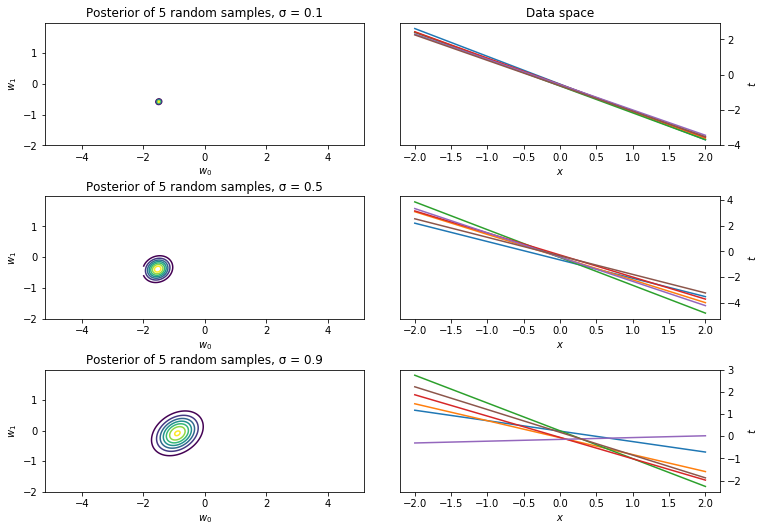

In [306]:
x = np.linspace(-2, 2, 200)
w = np.array([-1.5, -0.5])
X = np.ones((len(x), 2))
W = w.reshape(1,2)
X[:,0] = x
Y = get_y(X, W)
alpha = 2.0
sigma = 0.1
nr_samples = [5, 5, 5]
fig, axarr = plt.subplots(len(nr_samples), 2, figsize=(10, 7))
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=3.0)
for i in range(len(nr_samples)):
    shuffled_idx = np.random.permutation(len(X))
    nr = nr_samples[i]
    idx = shuffled_idx[:nr]
    samples = X[[idx]]
    labels = Y[idx]
    
    posterior_sigma = inv(get_posterior_cov_inverse(samples, alpha, (1/(sigma+i*0.4))**2))
    posterior_mean = get_posterior_mean(samples, labels, ((1/(sigma+i*0.4))**2), posterior_sigma)
    temp = Gauss(posterior_mean, posterior_sigma)
    axarr[i,0].contour(temp[0], temp[1], temp[2])
    axarr[i,0].axis('equal')
    axarr[i,0].set_xlabel('$w_0$')
    axarr[i,0].set_ylabel('$w_1$')
    axarr[i,0].set_title('Posterior of %s random samples, ' % str(len(samples)) + u'\u03c3 = '+ str(sigma+i*0.4))
    axarr[i,1].set_ylabel('$t$')
    axarr[i,1].yaxis.set_label_position("right")
    axarr[i,1].yaxis.tick_right()
    axarr[i,1].set_xlabel('$x$')
    if i == 0:
        axarr[i,1].set_title('Data space')
    
    
    for j in range(6):
        w_sample = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1).T
        axarr[i,1].plot(x , get_y(X, w_sample.T,0))
    
plt.savefig('foo2.eps', bbox_inches='tight')    
plt.show()


Non-parametric


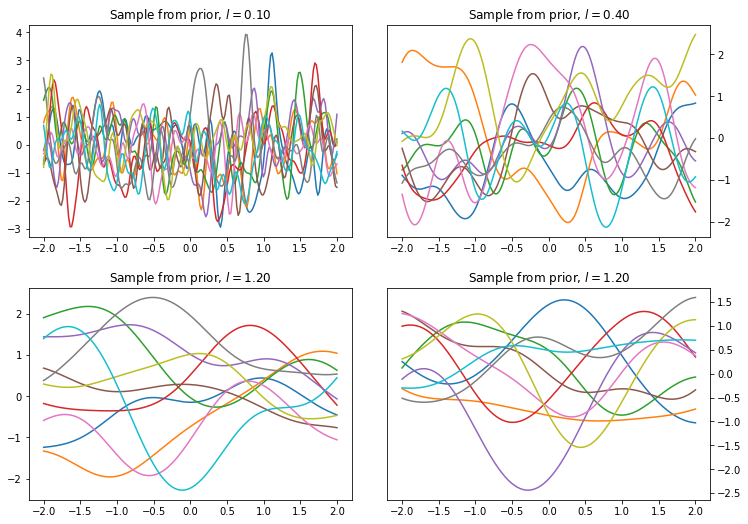

In [311]:
sigma = 1
X_GP = X

L = [0.1, 0.4, 1.2, 1.2]
fig, axarr = plt.subplots(2,2, figsize=(10, 7));
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
temp = 0
for i in range(2):
    for j in range(2):
        l = L[temp]
        K_GP = kernel_function(X_GP, X_GP, sigma, l)
        mu_GP = np.zeros(len(K_GP))
        for _ in range(10):
            prior_dist_GP = np.random.multivariate_normal(mu_GP, K_GP)
            axarr[i, j].plot(X_GP[:,0], prior_dist_GP)
            axarr[i, j].set_title('Sample from prior, $l = %.2f$' % l)
            if j == 1:
                axarr[i,j].yaxis.set_label_position("right")
                axarr[i,j].yaxis.tick_right()
                
        temp+=1
plt.savefig('GPprior.eps', bbox_inches='tight') 



plt.show()

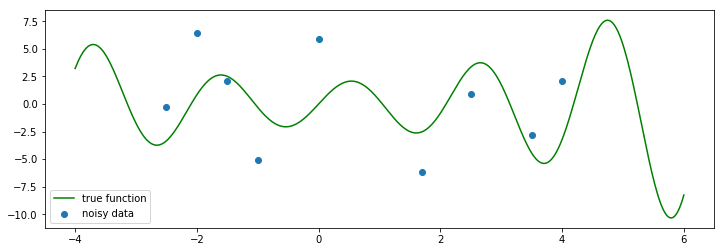

In [246]:
plt.figure(figsize=(12,4))
x, y = generateData()
X[:,0] = x
plt.scatter(x, y, label='noisy data')

x_true = np.linspace(-4, 6, 400)
y_true = (2+(0.5*x_true)**2)*np.sin(3*x_true)
plt.plot(x_true, y_true, 'g', label='true function')
# plt.title('Underlying data & noisy scattered data')
plt.legend()
plt.show()

(200, 200)


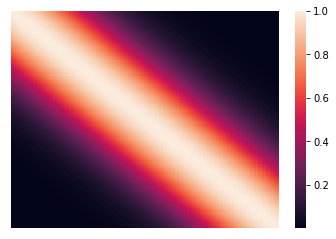

In [313]:
sns.heatmap(K_GP,xticklabels=False, yticklabels=False)
plt.savefig('Heatmap.eps', bbox_inches='tight')
print(np.shape(K_GP))
plt.show()
